# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [101]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [102]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
#just in case
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [103]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(filename, header=0)

In [104]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [105]:
# YOUR CODE HERE
selected_features = ['host_response_rate', 'host_acceptance_rate', 'host_identity_verified',
                     'instant_bookable', 'price', 'review_scores_rating', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                     'review_scores_value']

In [106]:
nan_count = np.sum(df[selected_features].isnull(), axis = 0)
nan_count

host_response_rate             11843
host_acceptance_rate           11113
host_identity_verified             0
instant_bookable                   0
price                              0
review_scores_rating               0
review_scores_cleanliness          0
review_scores_checkin              0
review_scores_communication        0
review_scores_location             0
review_scores_value                0
dtype: int64

In [107]:
nan_detected = nan_count !=0
nan_detected

host_response_rate              True
host_acceptance_rate            True
host_identity_verified         False
instant_bookable               False
price                          False
review_scores_rating           False
review_scores_cleanliness      False
review_scores_checkin          False
review_scores_communication    False
review_scores_location         False
review_scores_value            False
dtype: bool

In [108]:
to_impute = nan_detected 
to_impute

host_response_rate              True
host_acceptance_rate            True
host_identity_verified         False
instant_bookable               False
price                          False
review_scores_rating           False
review_scores_cleanliness      False
review_scores_checkin          False
review_scores_communication    False
review_scores_location         False
review_scores_value            False
dtype: bool

In [109]:
df[selected_features].columns[to_impute]

Index(['host_response_rate', 'host_acceptance_rate'], dtype='object')

In [110]:
to_impute_selected = ['host_response_rate', 'host_acceptance_rate']

In [111]:
for colname in to_impute_selected:
    df[colname + '_na'] = df[colname].isnull()

In [112]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,host_response_rate_na,host_acceptance_rate_na
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.41,False,3,3,0,0,0.33,9,False,False
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.64,False,1,1,0,0,4.86,6,False,False
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,False,1,1,0,0,0.02,3,False,False
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.36,False,1,0,1,0,3.68,4,False,False
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.92,False,1,0,1,0,0.87,7,True,True


In [113]:
for colname in to_impute_selected:
    df[colname].fillna(np.mean(df[colname]), inplace=True)

In [114]:
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

host_response_rate missing values count :0
host_acceptance_rate missing values count :0


In [115]:
for colname in selected_features:
    df[colname] = stats.mstats.winsorize(df[colname], limits=[0.01, 0.01])

In [116]:
df[selected_features].head()

,host_response_rate,host_acceptance_rate,host_identity_verified,instant_bookable,price,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0.800000,0.170000,True,False,150.0,4.70,4.62,4.76,4.79,4.86,4.41
1,0.090000,0.690000,True,False,75.0,4.45,4.49,4.78,4.80,4.71,4.64
2,1.000000,0.250000,True,False,275.0,5.00,5.00,5.00,5.00,4.50,5.00
3,1.000000,1.000000,True,False,68.0,4.21,3.73,4.66,4.42,4.87,4.36
4,0.906901,0.791953,True,False,75.0,4.91,4.82,4.97,4.95,4.94,4.92


In [117]:
to_encode = list(df[selected_features].select_dtypes(include=['bool']).columns)


df[to_encode] = df[to_encode].astype(int)

# Now, the boolean columns in the selected features are converted to 0 and 1
print(df[to_encode].head())

   host_identity_verified  instant_bookable
0                       1                 0
1                       1                 0
2                       1                 0
3                       1                 0
4                       1                 0


In [118]:
df[selected_features].head()

,host_response_rate,host_acceptance_rate,host_identity_verified,instant_bookable,price,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0.800000,0.170000,1,0,150.0,4.70,4.62,4.76,4.79,4.86,4.41
1,0.090000,0.690000,1,0,75.0,4.45,4.49,4.78,4.80,4.71,4.64
2,1.000000,0.250000,1,0,275.0,5.00,5.00,5.00,5.00,4.50,5.00
3,1.000000,1.000000,1,0,68.0,4.21,3.73,4.66,4.42,4.87,4.36
4,0.906901,0.791953,1,0,75.0,4.91,4.82,4.97,4.95,4.94,4.92


In [119]:
criteria = (df['host_response_rate'] >= 0.8) & (df['host_acceptance_rate'] >= 0.8) & (df['review_scores_communication'] >= 4.5) & \
           (df['review_scores_location'] >= 4.5) & (df['review_scores_value'] >= 4.5) & \
           (df['review_scores_cleanliness'] >= 4.5) & (df['review_scores_checkin'] >= 4.5) & \
           (df['review_scores_rating'] >= 4.5) & (df['host_identity_verified'] == 1) & \
           (df['price'] <= 100) & (df['instant_bookable'] == 1)


In [120]:
df.loc[criteria, 'host_is_superhost'] = True # For hosts that satisfy the criteria, set 'host_is_superhost' to True
df.loc[~criteria, 'host_is_superhost'] = False


In [121]:
count_ones = df['host_is_superhost'].value_counts()[1]
print("Number of values equal to 1 in 'host_is_superhost' column:", count_ones)
count_zeros = df['host_is_superhost'].value_counts()[0]
print("Number of values equal to 0 in 'host_is_superhost' column:", count_zeros)


Number of values equal to 1 in 'host_is_superhost' column: 1075
Number of values equal to 0 in 'host_is_superhost' column: 26947


In [122]:
dataset_False = df[df["host_is_superhost"] == False].sample(1075)
dataset_True = df[df["host_is_superhost"] == True]

df= pd.concat([dataset_False, dataset_True])
df

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,host_response_rate_na,host_acceptance_rate_na
16888,Sunny spacious room full of good energy,Our home at Pulaski street is beautiful and co...,NaN,Nilbia,"Brooklyn, New York, United States","Hi!\r\nI'm Nilbia, originally from Mexico, hav...",0.906901,0.791953,False,2.0,...,5.00,0,2,0,2,0,0.10,7,True,True
410,Luxury Designer Home Downtown Manhattan,New open space concept 1 bed 1 bath in one of ...,My apartment is located in a amazing trendy do...,M,"New York, New York, United States","I love design, gadgets, fashion, art, and cult...",0.906901,0.791953,False,2.0,...,4.62,0,1,1,0,0,1.77,5,True,True
17615,Authentic Brooklyn Artist Loft Experience,Brooklyn loft experience at its finest and mos...,"This is Williamsburg, Brooklyn. Quite possib...",Josh,"New York, New York, United States","Hey, \n\nI'm Josh. I like hosting on Airbnb!",1.000000,0.970000,False,1.0,...,4.71,0,1,1,0,0,1.91,5,False,False
6605,Sunny NYC Inwood 4 Professional! Uptown Manhattan,Wake up like You've lived in New York for ever...,Diversity <br />Fort Tryon Park <br />La Marin...,Angela,"New York, New York, United States",NaN,0.906901,0.791953,False,3.0,...,4.72,0,3,0,2,1,1.55,4,True,True
5450,Bright and spacious 1 bedroom,"Bright, spacious and very charming 1 bedroom a...","""Williamsburg is the epicenter of Brooklyn as ...",Jelena,"New York, New York, United States",Friendly Bosnian living in New York. Love trav...,0.906901,0.791953,False,1.0,...,4.76,0,1,1,0,0,0.30,5,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28009,Top of the world! Private room with balcony!,NaN,NaN,Eric,"Brooklyn, New York, United States",NaN,0.990000,0.980000,True,24.0,...,5.00,1,24,0,24,0,1.00,8,False,False
28010,Lovely 1-bedroom in Brooklyn for Travelers!,Take it easy at this unique getaway. Brand new...,NaN,Tayron,"New York, New York, United States",We are happy to share our place with you all!,0.906901,1.000000,True,1.0,...,5.00,1,6,0,6,0,1.00,2,True,False
28013,*NEW* Private Room for travelers in NYC!,Take it easy at this unique getaway. Brand new...,NaN,Tayron,"New York, New York, United States",We are happy to share our place with you all!,0.906901,1.000000,True,1.0,...,5.00,1,6,0,6,0,3.00,2,True,False
28014,Beautiful 1-Bedroom in a Prime Location in NYC,Take it easy at this unique getaway. Brand new...,NaN,Tayron,"New York, New York, United States",We are happy to share our place with you all!,0.906901,1.000000,True,1.0,...,5.00,1,6,0,6,0,1.00,2,True,False


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [123]:
# YOUR CODE HERE
X = df[selected_features]
y = df['host_is_superhost']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#y_train = y_train.astype(int)
#y_test = y_test.astype(int)

In [125]:
print("X_train shape:", X_train.shape)

# Check the shape of y_train
print("y_train shape:", y_train.shape)

# Check the data type of y_train
print("y_train data type:", y_train.dtype)

# Check the unique values in y_train (to ensure it only contains 0 or 1)
print("Unique values in y_train:", np.unique(y_train))

X_train shape: (1720, 11)
y_train shape: (1720,)
y_train data type: bool
Unique values in y_train: [False  True]


In [126]:
print("Data type of y_test:", y_test.dtypes)
print("Unique values in y_test:", y_test.unique())


Data type of y_test: bool
Unique values in y_test: [False  True]


In [127]:
model = LogisticRegression(max_iter=1000, C=1)
model.fit(X_train, y_train)
proba = model.predict_proba(X_test)
proba_predictions = proba[:, 1].tolist()

# 2. Make predictions on the test data using the predict() method
# YOUR CODE HERE
class_label_predictions = model.predict(X_test)

In [128]:
accuracy = accuracy_score(y_test, class_label_predictions)
print(accuracy)
pd.DataFrame(
confusion_matrix(y_test, class_label_predictions, labels=[True, False]),
columns=['Predicted: Not Superhost', 'Predicted: Superhost'],
index=['Actual: Not Superhost', 'Actual: Superhost']
)

0.9720930232558139


,Predicted: Not Superhost,Predicted: Superhost
Actual: Not Superhost,216,0
Actual: Superhost,12,202


In [129]:
from sklearn.svm import l1_min_c

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C = list(cs))
param_grid

{'C': [2.9143473319150176e-05,
  8.535087473042976e-05,
  0.0002499623753652826,
  0.0007320509519743478,
  0.0021439170415284044,
  0.00627877099067958,
  0.01838828853438035,
  0.053852761268973585,
  0.15771559658044,
  0.4618929246819322,
  1.352720203308595,
  3.961636670878463,
  11.602225703188205,
  33.97879524319736,
  99.51181400150382,
  291.4347331915018]}

In [130]:
print('Running Grid Search...')

# 1. Create a LogisticRegression model object with the argument max_iter=1000. 
#    Save the model object to the variable 'model'
# YOUR CODE HERE
model = LogisticRegression(max_iter=10000)

# 2. Run a grid search with 5-fold cross-validation and assign the output to the 
# object 'grid'.
# YOUR CODE HERE

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)


# 3. Fit the model on the training data and assign the fitted model to the 
#    variable 'grid_search'
# YOUR CODE HERE
grid_search = grid.fit(X_train, y_train)
print('Done')

Running Grid Search...
Done


In [131]:
# best_c = grid_search.best_params_['C']
best_c= grid_search.best_estimator_.C
best_c

291.4347331915018

In [132]:
model_best = LogisticRegression(max_iter=10000, C = best_c)
# 2. Fit the model to the training data below
model_best.fit(X_train, y_train)
proba_best = model_best.predict_proba(X_test)
proba_predictions_best = proba_best[:, 1].tolist()
# 2. Make predictions on the test data using the predict() method
# YOUR CODE HERE
class_label_predictions_best = model_best.predict(X_test)

In [133]:
accuracy_best = accuracy_score(y_test, class_label_predictions_best)
print(accuracy_best)
pd.DataFrame(
confusion_matrix(y_test, class_label_predictions_best, labels=[True, False]),
columns=['Predicted: Not Superhost', 'Predicted: Superhost'],
index=['Actual: Not Superhost', 'Actual: Superhost']
)

0.9883720930232558


,Predicted: Not Superhost,Predicted: Superhost
Actual: Not Superhost,215,1
Actual: Superhost,4,210


In [134]:
precision, recall, thresholds = precision_recall_curve(y_test,proba_predictions )
precision_best, recall_best, thresholds_best =precision_recall_curve(y_test,proba_predictions_best )


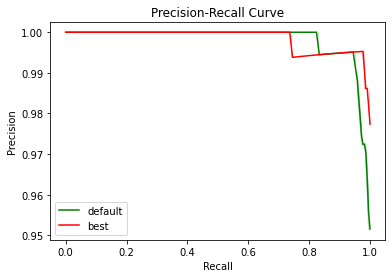

In [135]:
# YOUR CODE HERE
# Precision-Recall curve for "default" model
sns.lineplot(x=recall, y=precision, color='green', label='default')

# Precision-Recall curve for "best" model
sns.lineplot(x=recall_best, y=precision_best, color='red', label='best')

# Set plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Show the legend
plt.legend()

# Show the plot
plt.show()



In [136]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [137]:
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

Plotting ROC Curve...


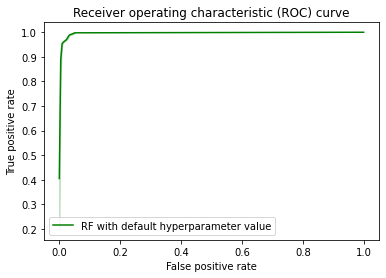

In [138]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr, y=tpr, color='green', label='default')


plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with default hyperparameter value'])
plt.show()


Plotting ROC Curve...


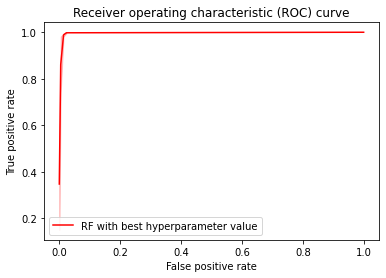

In [139]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_best, y=tpr_best, color='red', label='best')
plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with best hyperparameter value'])
plt.show()

In [140]:
# Calculate AUC for the default model
auc_default_value = auc(fpr, tpr)

# Calculate AUC for the best model
auc_best_value = auc(fpr_best, tpr_best)

print(auc_default_value)
print(auc_best_value)


0.9981178608515058
0.9985721703011423


In [141]:
##Notes: As I continued to work on the lab I realized i made many mistakes in my orignal plan because I was a bit confused and didn't fully grasp what needed to be done to solve my problem.
#However here I did these:
#Data Preparation: addressing missing values, winsorization. Almost did one hot encoding but the catergorical data i used did not call for it.

#Labeling: The code sets the label 'host_is_superhost' to True for hosts that satisfy the specified criteria and False for those who don't.

#Data Splitting: The code splits the data into training and test sets.

#Model Training: The code trains a Logistic Regression model on the training data.

#Model Evaluation: The code evaluates the model's performance using confusion matrices, precision-recall curves, and ROC curves.

#Grid Search for Hyperparameter Tuning: The code performs a grid search to find the best hyperparameter value (C) for the logistic regression model.



In [142]:
#additional using an random forest

In [153]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model on the training data
rf_model.fit(X_train, y_train)
rf_proba = rf_model.predict_proba(X_test)

# Make predictions on the test data
rf_class_label_predictions = rf_model.predict(X_test)

In [154]:
rf_accuracy = accuracy_score(y_test, rf_class_label_predictions)
print("Random Forest Accuracy:", rf_accuracy)
rf_confusion_matrix = confusion_matrix(y_test, rf_class_label_predictions, labels=[True, False])
rf_confusion_df = pd.DataFrame(rf_confusion_matrix, columns=['Predicted: Not Superhost', 'Predicted: Superhost'], index=['Actual: Not Superhost', 'Actual: Superhost'])
print(rf_confusion_df)


Random Forest Accuracy: 1.0
                       Predicted: Not Superhost  Predicted: Superhost
Actual: Not Superhost                       216                     0
Actual: Superhost                             0                   214


In [155]:
from sklearn.metrics import precision_score, recall_score

rf_precision = precision_score(y_test, rf_class_label_predictions)
rf_recall = recall_score(y_test, rf_class_label_predictions)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)


Random Forest Precision: 1.0
Random Forest Recall: 1.0


In [ ]:
#the more i ran random forest the more the accuracy increased but 1.0 seems highly unlikely